# COGS108 - Final Project

# Overview

For our project, we wanted to look more in-depth on how droughts affect the low-income communities in California. According to the U.S. Drought Monitor, since 2000, the longest duration of drought(D1-D4) in California lasted 376 weeks beginning on December 27, 2011 and ending on March 5th, 2019. Normally, California is only 7% in moderate drought(D2). After 2011, California was 100% in drought and 93% was in severe drought(D3). In 2015, 70% of California was in exceptional drought (D4). The severe drought had a huge impact on California, causing water prices to rise dramatically between the year 2011 and 2016. Take San Francisco as an example, the price of a monthly water bill for a family of four has increased an average of 20%. This dramatic increase put additional burden on all low-income communities in California.

One project that we found and will reference to would be from Circle Blue Organization. Circle Blue has been analyzing water prices in 30 major U.S. cities since 2010 and reflecting economic circumstances for water utilities. Circle Blue’s project could provide us a good reference on how to make good analysis on water prices and how they affect low-income communities in California during droughts.  


# Names

 - Chiehkun (Timo) Chen
 - Jordan Daley
 - Jacob Moul
 - Hannah Peterson
 - Yun (Denise) Tang
 - George Thomas


# Group Member IDs

 - A15754177
 - A92034679
 - A13548393
 - A13724073
 - A92134717
 - A12687821

# Research Question

#### Question: Did the 2011-19 drought in California disproportionately affect low-income communities?

This project will examine the impacts of climate change on low-income communities (specifically through the climatic event of drought). We will focus on California, because it has experienced prolonged drought within the past decade (for 376 consecutive weeks—Dec 2011 - March 2019). In particular, we will investigate whether or not the California drought has had disproportionate negative effects on low-income communities compared to average and high-income communities. This question is important because as the effects of global warming become more severe, efforts must be made to protect communities that are most vulnerable to these negative effects.

To answer this question we are planning on analyzing different indicators of economic well being such as unemployment rate and annual payroll and different effects of drought for various communities over time, from before during and after the most recent drought. 

## Background and Prior Work

Studying the processes that govern large-scale changes in earth's climate is an endeavor best left to experts within the field, but the effects of such changes are visible around the world.  One of the most often cited consequences of climate change is an increase in the severity and frequency of natural hazards and extreme weather.  On the east coast of the United States, coastal communities are forced to contend with issues such as sea level rise and an increase in the frequency of hurricane occurrence. On the other side of the country, especially in the state of California, the danger at hand is drought.  

According to the U.S. Drought Monitor, since 2000, the longest duration of drought (delineated by severity from D1-D4) in California lasted 376 weeks, beginning in December 2011 and ending in March 2019. Historically, California is only 7% in moderate drought (D2) conditions. After 2011, 100% of California was said to be in drought and 93% of the state was determined to be in severe drought (D3) conditions. In 2015, 70% of California was in exceptional drought (D4). The severe drought had a huge impact on the state, causing water prices to rise dramatically between the year 2011 and 2016. 

For this project, we wanted to take an in-depth look at how drought affects low-income communities in California. We are interested to see if drought and economic census data support our idea that drought conditions disproportionately affect low income communities. 

References:
 - 1)https://www.nbcnews.com/storyline/california-drought/california-drought-officially-over-after-more-seven-years-n983461
 - 2)https://droughtmonitor.unl.edu/


## Hypothesis

#### Hypothesis: The 2011-19 drought in California did disproportionately affect low-income communities negatively.

We expect to find that these communities will have suffered more than relatively better-off communities because they have fewer safeguards to deal with environmental events, and also have less means to bear the cost of higher utility or healthcare rates concurred from drought, for example. 

# Data Sets

**Community Economic Data**
 - Data Set Name: 'cbp[yr]co.txt' (Years 2012-2016)
      - We modified these files to include only observations for California, and they have been renamed 'cbp[yr]co_mod.csv'
 - Source: https://www.census.gov/programs-surveys/cbp/data/datasets.html
 - Number of observations: 36616

> These data sets are County Business Pattern data sets, and are provided with the description: “This series includes the number of establishments, employment during the week of March 12, first quarter payroll, and annual payroll. This data is useful for studying the economic activity of small areas; analyzing economic changes over time; and as a benchmark for other statistical series, surveys, and databases between economic censuses”. After being condensed to just the state of California, the 2016 data set (out of many others) is composed of 36616 observations of 26 variables, several of which are identifying information such as state or county code. In addition, it contains values for first quarter payroll, annual payroll, and number of employees, among other variables, for different industries in each county of California. This data comes from the US Census Bureau. All of these data sets are downloadable in csv format.

**Drought Data**
 - Data Set Name: 'CADrought20\*\*.txt' (Years 2000-2016)
 - Source: https://droughtmonitor.unl.edu/Data/DataDownload/ComprehensiveStatistics.aspx
 - Number of Observations per table: ~3000
 
> These data sets contain values for each county in California, showing the proportion of each county that is in Drought index D0-D4 in 5 day intervals. The data is collected by the United States Drought Monitor. The drought level is measured by D0 to D4, which describes the severity of drought in the specific county. There are about 3000 observations for 13 variables in each data set. We are combining the data sets from different years into one, so it ads up to 48256 observations. 

**Unemployment Data**
 - Data Set Name: 'Local_Area_Unemployment_Statistics__LAUS___Annual_Average.csv' (Years 1990-2017)
 - Source: https://www.bls.gov/lau/
 - Number of Observations: 3017
 
 > This data contains the annual average of unemployment rate in each county in California. There are 9 variables. 
 
 **Income**
 - Data Set Name: 'Local_Area_Unemployment_Statistics__LAUS___Annual_Average.csv' (Years 1990-2017)
 - Source: https://www.bls.gov/lau/
 - Number of Observations: 3017
 
 > This data contains the annual average of unemployment rate in each county in California. There are 9 variables.  
 
 **CA County Geographic Boundary Data**
 - Data Set Name: 'CA_Counties_TIGER2016.shp' (2016)
 - Source: https://data.ca.gov/dataset/ca-geographic-boundaries
 - Number of Observations:
 
 > This data contains geographic boundary data for the counties of California, used to make a chloropleth map. 

We merged community economic, drought data, and unemployment data sets by county and year.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
%matplotlib inline
import geopandas as gpd
import descartes

from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import kruskal, f_oneway

# Data Cleaning
### County Business Patterns Data

In [2]:
#Import and Wrangle County Business Patterns Data

cbp00 = pd.read_csv('Data/cb_patterns/cbp00co_mod.csv')
cbp01 = pd.read_csv('Data/cb_patterns/cbp01co_mod.csv')
cbp02 = pd.read_csv('Data/cb_patterns/cbp02co_mod.csv')
cbp03 = pd.read_csv('Data/cb_patterns/cbp03co_mod.csv')
cbp04 = pd.read_csv('Data/cb_patterns/cbp04co_mod.csv')
cbp05 = pd.read_csv('Data/cb_patterns/cbp05co_mod.csv')
cbp06 = pd.read_csv('Data/cb_patterns/cbp06co_mod.csv')
cbp07 = pd.read_csv('Data/cb_patterns/cbp07co_mod.csv')
cbp08 = pd.read_csv('Data/cb_patterns/cbp08co_mod.csv')
cbp09 = pd.read_csv('Data/cb_patterns/cbp09co_mod.csv')
cbp10 = pd.read_csv('Data/cb_patterns/cbp10co_mod.csv')
cbp11 = pd.read_csv('Data/cb_patterns/cbp11co_mod.csv')
cbp12 = pd.read_csv('Data/cb_patterns/cbp12co_mod.csv')
cbp13 = pd.read_csv('Data/cb_patterns/cbp13co_mod.csv')
cbp14 = pd.read_csv('Data/cb_patterns/cbp14co_mod.csv')
cbp15 = pd.read_csv('Data/cb_patterns/cbp15co_mod.csv')
cbp16 = pd.read_csv('Data/cb_patterns/cbp16co_mod.csv')

cbp00['year'] = 2000
cbp01['year'] = 2001
cbp02['year'] = 2002
cbp03['year'] = 2003
cbp04['year'] = 2004
cbp05['year'] = 2005
cbp06['year'] = 2006
cbp07['year'] = 2007
cbp08['year'] = 2008
cbp09['year'] = 2009
cbp10['year'] = 2010
cbp11['year'] = 2011
cbp12['year'] = 2012
cbp13['year'] = 2013
cbp14['year'] = 2014
cbp15['year'] = 2015
cbp16['year'] = 2016

cbp_data = [cbp00, cbp01, cbp02, cbp03, cbp04, cbp05, cbp06, cbp07, cbp08, 
            cbp09, cbp10, cbp11, cbp12, cbp13, cbp14, cbp15, cbp16]

In [3]:
# Variables to be used in CBP analysis, fips is combined state and county code; 
# for others, see county_layout_2015.txt
cbp_vars = ['fips', 'emp', 'ap', 'est', 'year']

simplified_cbp_data = []

for df in cbp_data:    
    # reformat FIPS county code for merging
    df[['fipstate', 'fipscty']] = df[['fipstate', 'fipscty']].astype(str)
    df['fips'] = df.fipstate.str.zfill(2) + df.fipscty.str.zfill(3)
    
    # select aggregate county data
    df = df[df.naics == '------']
    
    # drop unneccesary columns
    df = df[cbp_vars]
    
    simplified_cbp_data.append(df)

In [4]:
cbp_final = pd.concat(simplified_cbp_data).reset_index(drop=True)
cbp_final = cbp_final.rename(columns={'fips': 'FIPS', 'emp': 'employment', 'ap': 'annual_payroll', 
                                      'est': 'establishments'})

### Drought Data

In [5]:
#Import and Wrangle Drought Data

# collect all drought file names
drought_files = glob.glob('Data/drought/*')

# import all drought tables
drought_data = []
for file in drought_files:
    drought_data.append(pd.read_csv(file))

simplified_drought_data = []

for df in drought_data:
    # add year column, reformat FIPS column for merging
    df['Year'] = pd.to_datetime(df.ValidStart).dt.year
    df['FIPS'] = df.FIPS.astype(str).str.zfill(5)
    
    # make sure only CA data included
    df = df[df.FIPS.str[:2] == '06'].reset_index(drop=True)
    
    # average drought index per county per year
    by_year = df.groupby(['FIPS', 'County'])[['None', 'D0', 'D1', 'D2', 'D3', 'D4']].mean().reset_index()
    by_year['Year'] = df.Year[0]
    
    simplified_drought_data.append(by_year)



In [6]:
drought_final = pd.concat(simplified_drought_data)
drought_final = drought_final.rename(columns={'None': 'no_drought', 'County': 'county', 'Year': 'year'})


### Unemployment Data

In [7]:
# Import and Wrangle Unemployment Data
unemploy = pd.read_csv('Data/Local_Area_Unemployment_Statistics__LAUS___Annual_Average.csv')

# select county unemployment data
unemploy = unemploy[(unemploy['Area Type'] == 'County') & (unemploy['Year'] < 2017)]

# select desired variable
unemploy = unemploy[['Area Name', 'Year', 'Unemployment Rate']].reset_index(drop=True)

# rename columns for merging
unemploy = unemploy.rename(columns={'Area Name': 'county', 'Unemployment Rate': 'unemployment', 'Year': 'year'})

### Final Data Frame

In [8]:
# FIPS (Federal Information Processing Standards) is the county code

first_merge = pd.merge(left=cbp_final, right=drought_final, left_on=['FIPS', 'year'], right_on=['FIPS', 'year'], how='outer')
project_df = pd.merge(left=first_merge, right=unemploy, left_on=['county', 'year'], right_on=['county', 'year'])

#rearrange the columns
project_df=project_df[['FIPS','county','annual_payroll','establishments','employment','unemployment','no_drought','D0','D1','D2','D3','D4']]
project_df.head()


,FIPS,county,annual_payroll,establishments,employment,unemployment,no_drought,D0,D1,D2,D3,D4
0,06001,Alameda County,28627936,36391,655730,3.6,97.862500,2.137500,0.0,0.0,0.0,0.0
1,06003,Alpine County,13362,52,1048,6.3,94.659423,5.340577,0.0,0.0,0.0,0.0
2,06005,Amador County,174367,849,7378,5.2,94.334038,5.665962,0.0,0.0,0.0,0.0
3,06007,Butte County,1209766,4597,53776,6.2,94.517885,5.482115,0.0,0.0,0.0,0.0
4,06009,Calaveras County,125593,985,5757,5.6,94.230769,5.769231,0.0,0.0,0.0,0.0


# add comments/markdown?


In [9]:
income = pd.read_csv('Data/income_by_county_1999.csv', header=1)
income = income.iloc[:, 6:]
income = income.rename(columns={income.columns[0]: 'county', \
                                          income.columns[1]: 'income_avg_per_capita',
                                          income.columns[2]: 'poverty_percent'})
income.head()

,county,income_avg_per_capita,poverty_percent
0,California,22711,14.2
1,Alameda County,26680,11.0
2,Alpine County,24431,19.5
3,Amador County,22412,9.2
4,Butte County,17517,19.8


Plotting poverty rate against counties/income 

Text(0, 0.5, 'income ($/year)')

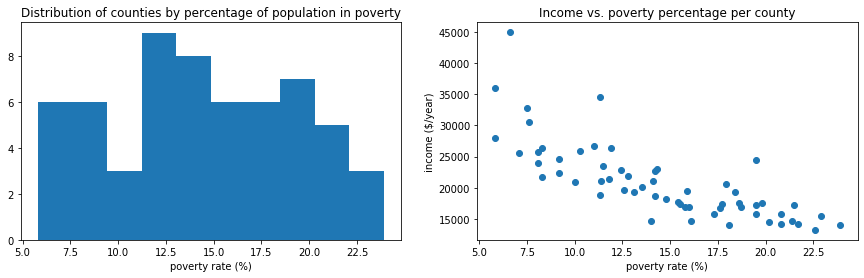

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,4));
ax[0].hist(income.iloc[:,2]);
ax[0].set_title('Distribution of counties by percentage of population in poverty');
ax[0].set_xlabel('poverty rate (%)')
ax[0].set_ylabel('')

ax[1].scatter(x=income.iloc[:,2], y=income.iloc[:,1]);
ax[1].set_title('Income vs. poverty percentage per county');
ax[1].set_xlabel('poverty rate (%)')
ax[1].set_ylabel('income ($/year)')

We assigned three socioeconomic groups based on poverty percentage histogram above. The roughly trimodal distribution, allows for binning of three income groups of 'Low', 'Middle', and 'Hight'. Also notice the negative relationship displayed in the scatter plot. 

In [11]:
def assign_group(poverty):
    if poverty > 17.5:
        return 'Low'
    elif poverty > 10:
        return 'Middle'
    else:
        return 'High'
    
income['ses_group'] = pd.Categorical(income.iloc[:,2].apply(assign_group), 
                                            categories=['Low', 'Middle', 'High'], 
                                            ordered=True)

In [12]:
# Counts of number of counties per socioeconomic group
income.ses_group.value_counts()

Middle    26
Low       20
High      13
Name: ses_group, dtype: int64

In [13]:
# merge income data to df
project_df = project_df.merge(income, on='county')
project_df.head()

,FIPS,county,annual_payroll,establishments,employment,unemployment,no_drought,D0,D1,D2,D3,D4,income_avg_per_capita,poverty_percent,ses_group
0,06001,Alameda County,28627936,36391,655730,3.6,97.862500,2.137500,0.000000,0.0,0.0,0.0,26680,11.0,Middle
1,06001,Alameda County,29759500,36468,670375,4.8,58.674151,41.325849,21.028868,0.0,0.0,0.0,26680,11.0,Middle
2,06001,Alameda County,29206644,36772,653437,6.7,45.283019,54.716981,0.000000,0.0,0.0,0.0,26680,11.0,Middle
3,06001,Alameda County,28571099,36706,625672,6.8,94.539811,5.460189,0.000000,0.0,0.0,0.0,26680,11.0,Middle
4,06001,Alameda County,29886705,36799,626076,5.9,69.212642,30.787358,0.000000,0.0,0.0,0.0,26680,11.0,Middle


In [15]:
# Assign numeric values to each SES Group value, from low to high
def assign_index(group):
    if group == 'Low':
        return 1
    elif group == 'Middle':
        return 2
    else:
        return 3
    
project_df['ses_index'] = project_df['ses_group'].apply(assign_index)

Text(0.5, 1, 'SES Index of CA Counties')

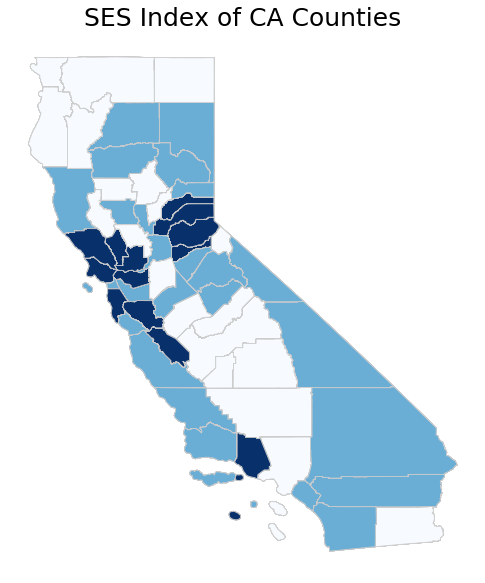

In [16]:
# Create a chloropleth map of SES Groups throughout California

fp = "Data/CA_Counties/CA_Counties_TIGER2016.shp"

map_df = gpd.read_file(fp)
data_for_map = project_df.filter(['county','ses_index','poverty_percent'], axis=1)
map_df.head()
merged = map_df.set_index('NAMELSAD').join(data_for_map.set_index('county'))
# set variable for map
variable = 'ses_index'
# set chloropleth range
vmin, vmax = 1, 3
# create figure and axes
fig, ax = plt.subplots(1, figsize=(15, 10))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('SES Index of CA Counties', fontdict={'fontsize': '25', 'fontweight' : '3'})

Here we assign drought "levels" to each county on a scale of 0-3. This feature was added to simplify the D0-D4 variables. The D0-D4 variables represent the geographical proportion of a given county that is experiencing a particular drought intensity, where 

 - No Drought = no drought
 - D0 = abnormally dry
 - D1 = moderate drought
 - D2 = severe drought
 - D3 = extreme drought
 - D4 = exceptional drought
 
With this in mind, and due to the small number of large values for extreme and exceptional drought, we marked any county as experiencing level 3 drought (severe or more) if more than half of its area is in D2-D4. Likewise, a county is experiencing level 2 drought (moderate drought) if more than half its area is in D1, level 1 drought (abnormally dry) if more than half its area is in D0, and not experiencing drought otherwise.

In [40]:
# assign "drought levels" to facilitate analysis

def assign_drought(row):
    if row['D2'] > 50:
        return 3
    elif row['D1'] > 50: 
        return 2
    elif row['D0'] > 50:
        return 1
    else:
        return 0
    
project_df['drought_level'] = project_df.apply(lambda x: assign_drought(x), axis=1)

# create new feature to make payroll numbers less relative
project_df['pay_per_employee'] = project_df['annual_payroll'] / project_df['employment']

In [41]:
project_df.head()

,FIPS,county,annual_payroll,establishments,employment,unemployment,no_drought,D0,D1,D2,D3,D4,income_avg_per_capita,poverty_percent,ses_group,drought_level,pay_per_employee
0,06001,Alameda County,28627936,36391,655730,3.6,97.862500,2.137500,0.000000,0.0,0.0,0.0,26680,11.0,Middle,0,43.658115
1,06001,Alameda County,29759500,36468,670375,4.8,58.674151,41.325849,21.028868,0.0,0.0,0.0,26680,11.0,Middle,0,44.392318
2,06001,Alameda County,29206644,36772,653437,6.7,45.283019,54.716981,0.000000,0.0,0.0,0.0,26680,11.0,Middle,1,44.696955
3,06001,Alameda County,28571099,36706,625672,6.8,94.539811,5.460189,0.000000,0.0,0.0,0.0,26680,11.0,Middle,0,45.664660
4,06001,Alameda County,29886705,36799,626076,5.9,69.212642,30.787358,0.000000,0.0,0.0,0.0,26680,11.0,Middle,0,47.736545


The D0 - D4 columns above were recorded as rolling sums, meaning that the percentage of a county that experienced some level of drought was recorded as having experienced all lower severity levels of drought as well. This was normalized (????? correct word??????) in the table below.

In [17]:
drought_levels = project_df.drop(["D0", "D1", "D2", "D3", "D4", "no_drought"], axis = 1)
drought_levels['no_drought'] = project_df['no_drought']
drought_levels['lvl0'] = project_df['D0'] - project_df['D1']
drought_levels['lvl1'] = project_df['D1'] - project_df['D2']
drought_levels['lvl2'] = project_df['D2'] - project_df['D3']
drought_levels['lvl3'] = project_df['D3'] - project_df['D4']
drought_levels['lvl4'] = project_df['D4']
drought_levels.head()

,FIPS,employment,annual_payroll,establishments,year,county,unemployment,income_avg_per_capita,poverty_percent,ses_group,drought_level,pay_per_employee,no_drought,lvl0,lvl1,lvl2,lvl3,lvl4
0,06001,655730,28627936,36391,2000,Alameda County,3.6,26680,11.0,Middle,0,43.658115,97.862500,2.137500,0.000000,0.0,0.0,0.0
1,06001,670375,29759500,36468,2001,Alameda County,4.8,26680,11.0,Middle,0,44.392318,58.674151,20.296981,21.028868,0.0,0.0,0.0
2,06001,653437,29206644,36772,2002,Alameda County,6.7,26680,11.0,Middle,1,44.696955,45.283019,54.716981,0.000000,0.0,0.0,0.0
3,06001,625672,28571099,36706,2003,Alameda County,6.8,26680,11.0,Middle,0,45.664660,94.539811,5.460189,0.000000,0.0,0.0,0.0
4,06001,626076,29886705,36799,2004,Alameda County,5.9,26680,11.0,Middle,0,47.736545,69.212642,30.787358,0.000000,0.0,0.0,0.0


# Data Analysis & Results

In [18]:
### Descriptive Analysis on Unemployment

##Central Tendency, Variability
project_df.describe()

,employment,annual_payroll,establishments,year,no_drought,D0,D1,D2,D3,D4,unemployment,income_avg_per_capita,poverty_percent,drought_level,pay_per_employee
count,9.860000e+02,9.860000e+02,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,2.264094e+05,1.098268e+07,14822.783976,2008.000000,42.027815,57.972185,42.710534,27.444563,14.475111,7.364515,8.810649,20892.258621,14.500000,1.326572,37.126181
std,5.530495e+05,2.725970e+07,35173.618793,4.901466,40.470664,40.470664,41.357286,36.588673,31.578546,22.143001,3.878966,6131.120533,4.912018,1.245843,13.366675
min,1.620000e+02,4.053000e+03,35.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,13239.000000,5.800000,0.000000,10.734532
25%,8.930250e+03,2.605378e+05,915.750000,2004.000000,0.438019,9.456299,0.000000,0.000000,0.000000,0.000000,5.800000,16856.000000,11.000000,0.000000,29.059193
50%,4.572900e+04,1.547160e+06,3914.000000,2008.000000,27.013113,72.986887,31.957075,1.740755,0.000000,0.000000,8.100000,19417.000000,14.250000,1.000000,34.512671
75%,1.663308e+05,6.516260e+06,12078.750000,2012.000000,90.543701,99.561981,86.688538,52.830189,2.420755,0.000000,10.700000,24007.000000,18.600000,3.000000,41.540011
max,4.007163e+06,2.128736e+08,269489.000000,2016.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,28.900000,44962.000000,23.900000,3.000000,112.484143


In [19]:
##size
project_df.shape

(986, 18)

In [20]:
## Missing Values

pd.DataFrame(project_df.isnull().sum()).rename(columns={0:'Number of Missing Values'})

,Number of Missing Values
FIPS,0
employment,0
annual_payroll,0
establishments,0
year,0
county,0
no_drought,0
D0,0
D1,0
D2,0


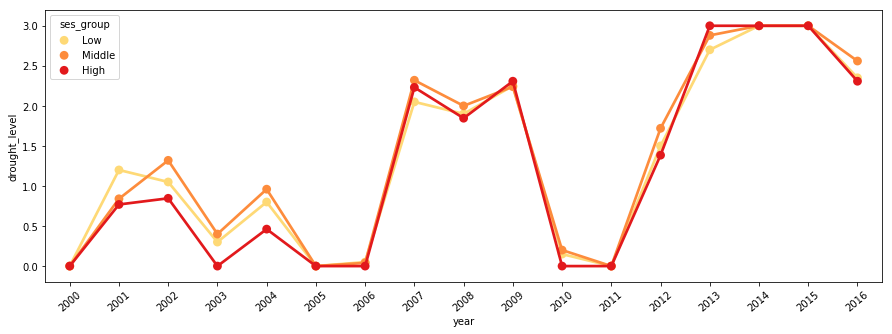

In [21]:
avg_per_year_df = project_df.groupby(['year', 'ses_group'])[['employment', 'annual_payroll', 'establishments', 'unemployment', 
                                                    'pay_per_employee', 'drought_level']].mean().reset_index()

fig, ax = plt.subplots(figsize=(15,5))

sns.pointplot(x='year', y='drought_level', hue='ses_group', data=avg_per_year_df, palette=sns.color_palette('YlOrRd', 3))

plt.sca(ax)
plt.xticks(rotation=40);

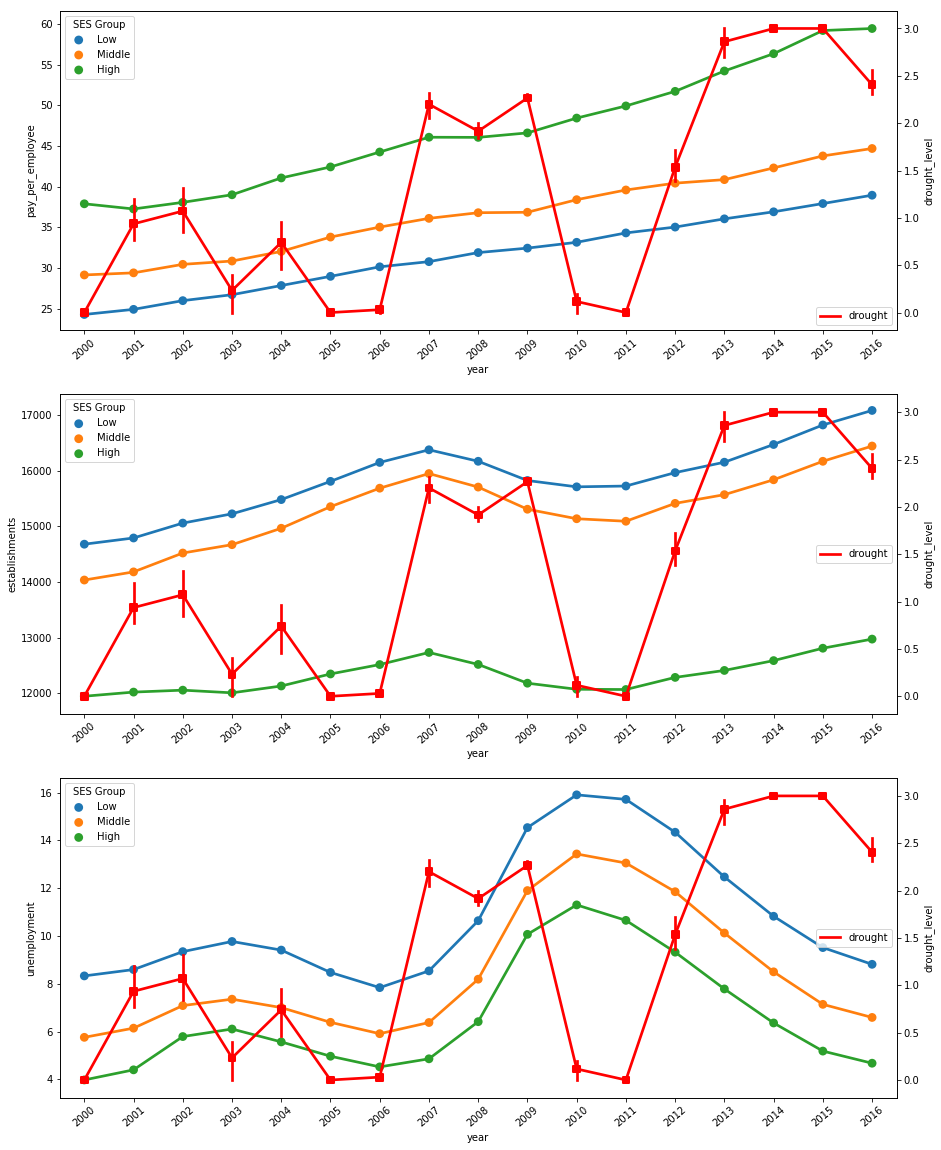

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15, 20))
sns.pointplot(x='year', y='pay_per_employee', hue='ses_group', size='drought_level', data=avg_per_year_df, 
             legend='false', ax=ax1)
ax1.legend(loc='upper left', title='SES Group')
ax1_1 = ax1.twinx()
sns.pointplot(x='year', y='drought_level', data=avg_per_year_df, 
             legend='false', ax=ax1_1, markers='s', color='red', label='drought')
ax1_1.legend(loc='lower right', labels=['drought'])

sns.pointplot(x='year', y='establishments', hue='ses_group', data=avg_per_year_df, 
             legend='false', ax=ax2);
ax2.legend(loc='upper left', title='SES Group')
ax2_1 = ax2.twinx()
sns.pointplot(x='year', y='drought_level', data=avg_per_year_df, 
             legend='false', ax=ax2_1, markers='s', color='red', label='drought')
ax2_1.legend(loc='center right', labels=['drought'])

sns.pointplot(x='year', y='unemployment', hue='ses_group', data=avg_per_year_df, 
             legend='false', ax=ax3);
ax3.legend(loc='upper left', title='SES Group')
ax3_1 = ax3.twinx()
sns.pointplot(x='year', y='drought_level', data=avg_per_year_df, 
             ax=ax3_1, markers='s', color='red', label='drought')
ax3_1.legend(loc='center right', labels=['drought'])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=40)

### Change Per year for each variable by income and drought group

This data frame contains the average change per year in each of the variables, grouped by drought level and socioeconomic group. In other words, each row contains one measured difference between subsequent years for all variables in that group. For example, the group DroughtLevel = 0, SESGroup = Low is the collection of all yearly differences of each variable for counties under these two designations.

In [97]:
# keep only desired variables
temp_df = project_df.drop(['no_drought', 'D0', 'D1', 'D2', 'D3', 'D4', 'income_avg_per_capita', 'poverty_percent'],axis=1)

# group by year, drought level, and SES
# average values for each group for each year
# use function diff to find difference between average values for each year
temp_df = (temp_df
 .groupby(['year', 'drought_level', 'ses_group']).mean().dropna(how='all').reset_index()
 .groupby(['drought_level', 'ses_group'])
 .apply(lambda x: x.sort_values(by='year').diff())
)

# divide by year column to make differences all in terms of 1 year
# drop Year column as it is no longer meaningful
change_per_year_df = temp_df.apply(lambda x: x / temp_df['year']).dropna().drop('year', axis=1)
change_per_year_df.head(29)

employment  annual_payroll  establishments  \
drought_level ses_group                                                     
0             Low       3   587884.750000    2.179051e+07    34485.900000   
                        14 -812549.250000   -2.972880e+07   -47756.950000   
                        24  277242.187500    1.045914e+07    17084.625000   
                        32 -272067.937500   -1.021516e+07   -16935.446429   
                        40  221660.100000    9.149754e+06    14250.171429   
                        43   18423.742105    1.253376e+06     1059.242105   
                        48 -237240.842105   -1.036338e+07   -14801.842105   
                        57  -16493.000000   -4.694375e+05    -1564.000000   
                        66    -207.000000   -7.990000e+02      -36.000000   
                        75  246437.500000    1.152517e+07    16916.833333   
                        82  -20868.700000   -8.641915e+05    -1658.083333   
                        85 -217406.800000   -1.038117e+07   -14411.416667   
              Middle    4   204387.240000    8.100817e+06    12085.993333   
                        15 -391148.000000   -1.537682e+07   -22425.833333   
                        25  203846.000000    8.720754e+06    11603.500000   
                        33  -27994.333333    1.045789e+06    -2392.500000   
                        41   24796.813333   -7.453361e+05     2446.240000   
                        44   -4292.438333    4.511326e+05     -440.948333   
                        76    6218.275298    4.804450e+05      756.593750   
                        83  -37225.062857   -1.423176e+06    -2847.306667   
                        86  368719.920000    1.873205e+07    24826.140000   
              High      5   160674.397436    8.887807e+06     7505.089744   
                        16 -219797.166667   -1.460375e+07    -7528.666667   
                        26   49079.076923    4.087759e+06       84.730769   
                        34   89458.208791    6.399536e+06     5242.197802   
                        42  -82522.978022   -5.074864e+06    -4903.274725   
                        45    3967.692308    7.750359e+05      168.615385   
                        77   -4435.634615    6.121902e+04     -110.942308   
                        84     629.538462    5.033754e+05       -4.230769   

                            unemployment  pay_per_employee  
drought_level ses_group                                     
0             Low       3       1.890000          3.472633  
                        14     -1.645000         -5.688737  
                        24      0.843750          5.997886  
                        32     -0.961607         -0.765060  
                        40      0.017857          1.670882  
                        43     -1.032895          1.407662  
                        48     -0.742105         -3.681963  
                        57      2.100000         -0.919752  
                        66      3.000000          1.030575  
                        75      4.094444          6.689554  
                        82     -0.179444          0.813562  
                        85     -3.148333         -3.982765  
              Middle    4      -0.468333          4.660038  
                        15      1.558333         -7.588905  
                        25      0.795000          5.814823  
                        33      0.038333          5.084630  
                        41     -1.295333         -3.312640  
                        44     -0.438000          1.338684  
                        76      1.823214          1.154369  
                        83     -0.190857         -0.167007  
                        86     -3.502000          2.317225  
              High      5       0.606410          7.245922  
                        16      0.316667         -6.018736  
                        26      1.207692         -0.117489  
                        34     -0.907692          8.80098

## Tests for Effect of Drought on Economic Performance across SES Groups

In this section, we used the `change_per_year_df` that contains the yearly changes for each variable across each Drought-SES grouping. To test for effect of drought level on Economic Performance we chose three variables--Unemployment, Number of Establishments, and Pay Per Employee--and performed difference of mean tests for these variables across the different groups. Independent 2-sample t-tests or ANOVA tests were used where appropriate, and where assumptions were violated, the non-parametric Kruskal-Wallis test was used.

In [98]:
## collect the data groups into dictionaries for ease of access

temp = change_per_year_df.reset_index().groupby(['drought_level', 'ses_group'])
unemp_dict = {}
est_dict = {}
ppe_dict = {}
for name, df in temp:
    key = 'Drought: %s, SES: %s' % (name)
    unemp_dict[key] = df.unemployment
    est_dict[key] = df.establishments
    ppe_dict[key] = df.pay_per_employee

### Unemployment Comparisons by Drought Level and SES Group

First, overall effects of drought on Unemployment Rates were tested, without specifying different socio-economic groups.

In [99]:
## separate different groups

unemploy_none = np.concatenate((unemp_dict['Drought: 0, SES: Low'], 
                                     unemp_dict['Drought: 0, SES: Middle'], 
                                     unemp_dict['Drought: 0, SES: High']))
unemploy_dry = np.concatenate((unemp_dict['Drought: 1, SES: Low'], 
                                     unemp_dict['Drought: 1, SES: Middle'], 
                                     unemp_dict['Drought: 1, SES: High']))
unemploy_moderate = np.concatenate((unemp_dict['Drought: 2, SES: Low'], 
                                     unemp_dict['Drought: 2, SES: Middle'], 
                                     unemp_dict['Drought: 2, SES: High']))
unemploy_severe = np.concatenate((unemp_dict['Drought: 3, SES: Low'], 
                                     unemp_dict['Drought: 3, SES: Middle'], 
                                     unemp_dict['Drought: 3, SES: High']))

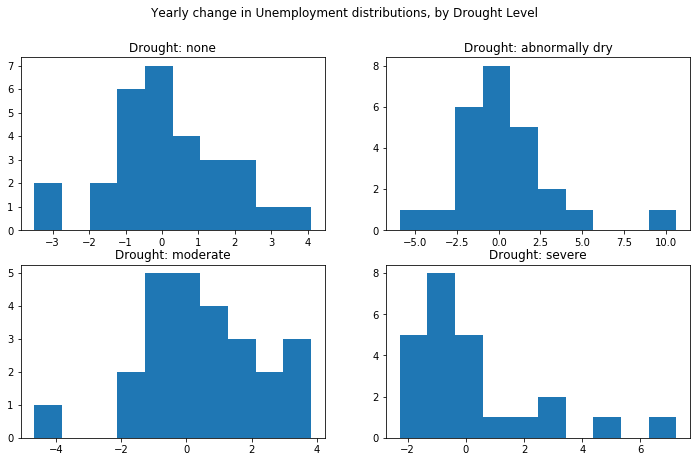

In [100]:
fig, (a1, a2) = plt.subplots(2, 2,figsize=(12,7))
fig.suptitle('Yearly change in Unemployment distributions, by Drought Level')
a1[0].hist(unemploy_none) 
a1[0].set_title('Drought: none');
a1[1].hist(unemploy_dry)
a1[1].set_title('Drought: abnormally dry');
a2[0].hist(unemploy_moderate) 
a2[0].set_title('Drought: moderate');
a2[1].hist(unemploy_severe)
a2[1].set_title('Drought: severe');


The following table shows the result of comparing all pairs of drought levels and performing t-tests on their yearly change in unemployment means. The table shows that no significant differences in means were found at a significance level of $\alpha = 0.05$, which suggests that drought levels do not affect economic performance overall. These results were verified with the ANOVA test (`f_oneway`), and because of the skew of the last distribution, the non-parametric Kruskal-Wallis test was used to make sure our conclusions were valid (see following two cells). All tests showed lack of significant effect.

We used `alternative='smaller'` because we hypothesized that the change in unemployment rates would be smaller (smaller in magnitude or more negative) for counties experiencing less severe drought.

In [101]:
print('Overall Comparisons for Change in Unemployment by Drought Level')

# perform 2 sample t-test on all pairs of drought levels
pd.DataFrame(
    {'None - Dry': ttest_ind(unemploy_none, unemploy_dry, alternative='smaller'),
     'None - Moderate': ttest_ind(unemploy_none, unemploy_moderate, alternative='smaller'), 
     'None - Severe': ttest_ind(unemploy_none, unemploy_severe, alternative='smaller'),
     'Dry - Moderate': ttest_ind(unemploy_dry, unemploy_moderate, alternative='smaller'),
     'Dry - Severe': ttest_ind(unemploy_dry, unemploy_severe, alternative='smaller'),
     'Moderate - Severe': ttest_ind(unemploy_moderate, unemploy_severe, alternative='smaller'),
    },
    index = ['t statistic', 'p value', 'df']).T

Overall Comparisons for Change in Unemployment by Drought Level


,t statistic,p value,df
None - Dry,-0.307547,0.379828,52.0
None - Moderate,-0.694435,0.245250,52.0
None - Severe,-0.187516,0.426000,51.0
Dry - Moderate,-0.186549,0.426400,48.0
Dry - Severe,0.131935,0.552201,47.0
Moderate - Severe,0.395975,0.653042,47.0


In [102]:
# perform ANOVA test to double check t-test results
# perform Kruskal-Wallis becuase of skew in histogram to verify results

(f_oneway(unemploy_none, unemploy_dry, unemploy_moderate, unemploy_severe), 
kruskal(unemploy_none, unemploy_dry, unemploy_moderate, unemploy_severe))

(F_onewayResult(statistic=0.10767273203879904, pvalue=0.9554313159550631),
 KruskalResult(statistic=1.6867551132013705, pvalue=0.6398824409412616))

Next, effects of drought levels were compared for each socio-economic group. The following histograms show that because of the relatively small sample size, we could not ensure the normality assumption was met, and so the Kruskal-Wallis non-parametric test was used rather than two-sample t-tests to test for difference in means across groups.

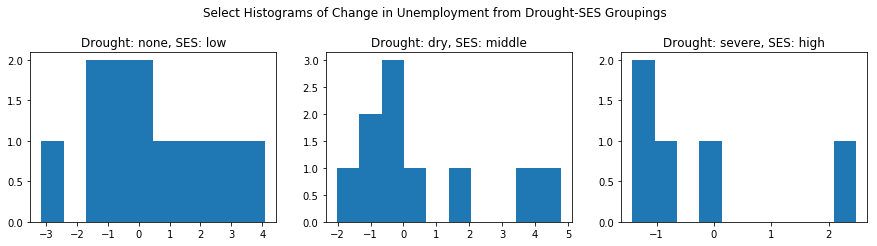

In [103]:
fig, ax = plt.subplots(1,3, figsize=(15,3.5))
fig.suptitle('Select Histograms of Change in Unemployment from Drought-SES Groupings')

ax[0].hist(unemp_dict['Drought: 0, SES: Low'])
ax[0].set_title('Drought: none, SES: low')
ax[1].hist(unemp_dict['Drought: 1, SES: Middle'])
ax[1].set_title('Drought: dry, SES: middle')
ax[2].hist(unemp_dict['Drought: 3, SES: High'])
ax[2].set_title('Drought: severe, SES: high');
plt.subplots_adjust(top=0.8)

The first table below shows the results of performing the same tests as above, but for each socio-economic group. Again, no significant differences were found at a significance level of $\alpha = 0.05$, which suggests no effect of drought on change in unemployment among socio-economic groups.

The second table shows the results of comparing changes in unemployment of each socio-economic group at each level of drought. This test was performed because we hypothesized that lower socio-economic communities would be more affected by severe drought levels than higher socio-economic groups. No significant differences in means were found, which again suggests that drought does not influence change in unemployment rates.

In [104]:
# perform Kruskal-Wallis test for difference in means by drought levels across each socio-economic group

display(pd.DataFrame({'Low': list(kruskal(unemp_dict['Drought: 0, SES: Low'], 
         unemp_dict['Drought: 1, SES: Low'], 
         unemp_dict['Drought: 2, SES: Low'], 
         unemp_dict['Drought: 3, SES: Low'])),
 'Middle': list(kruskal(unemp_dict['Drought: 0, SES: Middle'], 
         unemp_dict['Drought: 1, SES: Middle'], 
         unemp_dict['Drought: 2, SES: Middle'], 
         unemp_dict['Drought: 3, SES: Middle'])),
 'High': list(kruskal(unemp_dict['Drought: 0, SES: High'], 
         unemp_dict['Drought: 1, SES: High'], 
         unemp_dict['Drought: 2, SES: High'], 
         unemp_dict['Drought: 3, SES: High']))}, index=['H statistic', 'p value']).T)

# perform Kruskal-Wallis test for difference in means by socio-economic group across drought levels

display(pd.DataFrame({'None': list(kruskal(unemp_dict['Drought: 0, SES: Low'], 
         unemp_dict['Drought: 0, SES: Middle'], 
         unemp_dict['Drought: 0, SES: High'])),
 'Dry': list(kruskal(unemp_dict['Drought: 1, SES: Low'], 
         unemp_dict['Drought: 1, SES: Middle'], 
         unemp_dict['Drought: 1, SES: High'])),
 'Moderate': list(kruskal(unemp_dict['Drought: 2, SES: Low'], 
         unemp_dict['Drought: 2, SES: Middle'], 
         unemp_dict['Drought: 2, SES: High'])),
 'Severe': list(kruskal(unemp_dict['Drought: 3, SES: Low'], 
         unemp_dict['Drought: 3, SES: Middle'], 
         unemp_dict['Drought: 3, SES: High']))}, index=['H statistic', 'p value']).T)

,H statistic,p value
Low,0.408804,0.938418
Middle,1.189573,0.755506
High,1.067935,0.784820


,H statistic,p value
None,0.181034,0.913459
Dry,0.347077,0.840685
Moderate,0.116308,0.943505
Severe,0.392000,0.822012


### Pay Per Employee Comparisons by Drought Level and SES Group

First, overall effects of drought on Pay Per Employee were tested, without specifying different socio-economic groups.

In [105]:
## separate different groups

ppe_none = np.concatenate((ppe_dict['Drought: 0, SES: Low'], 
                                     ppe_dict['Drought: 0, SES: Middle'], 
                                     ppe_dict['Drought: 0, SES: High']))
ppe_dry = np.concatenate((ppe_dict['Drought: 1, SES: Low'], 
                                     ppe_dict['Drought: 1, SES: Middle'], 
                                     ppe_dict['Drought: 1, SES: High']))
ppe_moderate = np.concatenate((ppe_dict['Drought: 2, SES: Low'], 
                                     ppe_dict['Drought: 2, SES: Middle'], 
                                     ppe_dict['Drought: 2, SES: High']))
ppe_severe = np.concatenate((ppe_dict['Drought: 3, SES: Low'], 
                                     ppe_dict['Drought: 3, SES: Middle'], 
                                     ppe_dict['Drought: 3, SES: High']))

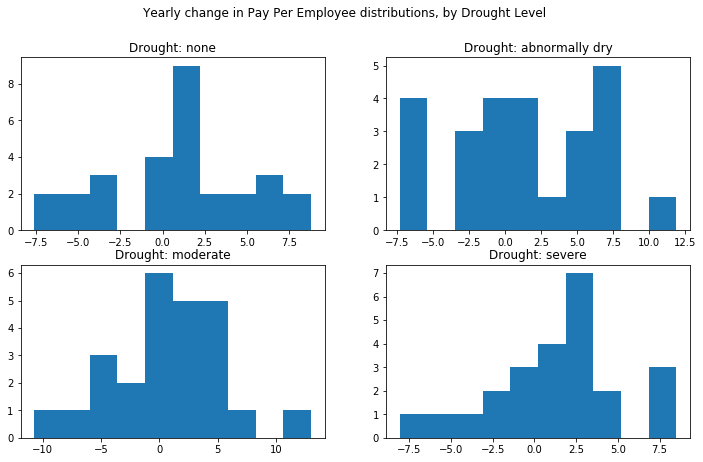

In [106]:
fig, (a1, a2) = plt.subplots(2, 2,figsize=(12,7))
fig.suptitle('Yearly change in Pay Per Employee distributions, by Drought Level')
a1[0].hist(ppe_none) 
a1[0].set_title('Drought: none');
a1[1].hist(ppe_dry)
a1[1].set_title('Drought: abnormally dry');
a2[0].hist(ppe_moderate) 
a2[0].set_title('Drought: moderate');
a2[1].hist(ppe_severe)
a2[1].set_title('Drought: severe');


The following table shows the result of comparing all pairs of drought levels and performing t-tests on their yearly change in Pay Per Employee means. The table shows that no significant differences in means were found at a significance level of $\alpha = 0.05$, which suggests that drought levels do not affect pay per employee. These results were verified with the ANOVA test (`f_oneway`), and because of the skew of the apparent non-normality of one or more histogram, the non-parametric Kruskal-Wallis test was used to make sure our conclusions were valid (see following two cells). All tests showed lack of significant effect.

We used `alternative='larger'` because we hypothesized that the change in Pay Per Employee would be larger for counties experiencing less severe drought.

In [107]:
print('Overall Comparisons for Change in ppement by Drought Level')

# perform 2 sample t-test on all pairs of drought levels
pd.DataFrame(
    {'None - Dry': ttest_ind(ppe_none, ppe_dry, alternative='larger'),
     'None - Moderate': ttest_ind(ppe_none, ppe_moderate, alternative='larger'), 
     'None - Severe': ttest_ind(ppe_none, ppe_severe, alternative='larger'),
     'Dry - Moderate': ttest_ind(ppe_dry, ppe_moderate, alternative='larger'),
     'Dry - Severe': ttest_ind(ppe_dry, ppe_severe, alternative='larger'),
     'Moderate - Severe': ttest_ind(ppe_moderate, ppe_severe, alternative='larger'),
    },
    index = ['t statistic', 'p value', 'df']).T

Overall Comparisons for Change in ppement by Drought Level


,t statistic,p value,df
None - Dry,-0.529215,0.700546,52.0
None - Moderate,0.034361,0.486360,52.0
None - Severe,-0.346276,0.634720,51.0
Dry - Moderate,0.499017,0.310024,48.0
Dry - Severe,0.211716,0.416622,47.0
Moderate - Severe,-0.336084,0.630848,47.0


In [108]:
# perform ANOVA test to double check t-test results
# perform Kruskal-Wallis becuase of skew in histogram to verify results

(f_oneway(ppe_none, ppe_dry, ppe_moderate, ppe_severe), 
kruskal(ppe_none, ppe_dry, ppe_moderate, ppe_severe))

(F_onewayResult(statistic=0.140109153552748, pvalue=0.9357564081672843),
 KruskalResult(statistic=0.2986416136591288, pvalue=0.9602837533745237))

Next, effects of drought levels were compared for each socio-economic group. The following histograms show that because of the relatively small sample size, we could not ensure the normality assumption was met, and so the Kruskal-Wallis non-parametric test was used rather than two-sample t-tests to test for difference in means across groups.

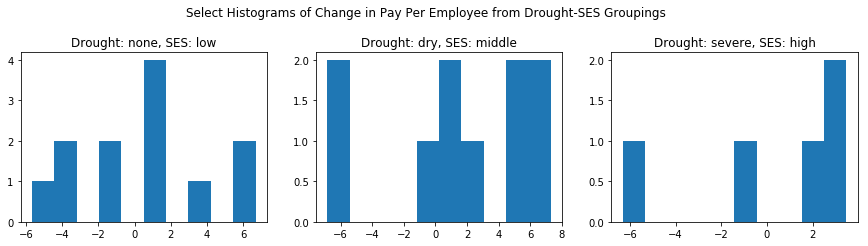

In [109]:
fig, ax = plt.subplots(1,3, figsize=(15,3.5))
fig.suptitle('Select Histograms of Change in Pay Per Employee from Drought-SES Groupings')

ax[0].hist(ppe_dict['Drought: 0, SES: Low'])
ax[0].set_title('Drought: none, SES: low')
ax[1].hist(ppe_dict['Drought: 1, SES: Middle'])
ax[1].set_title('Drought: dry, SES: middle')
ax[2].hist(ppe_dict['Drought: 3, SES: High'])
ax[2].set_title('Drought: severe, SES: high');
plt.subplots_adjust(top=0.8)

The first table below shows the results of performing the same tests as above, but for each socio-economic group. Again, no significant differences were found at a significance level of $\alpha = 0.05$, which suggests no effect of drought on change in Pay Per Employee among socio-economic groups.

The second table shows the results of comparing changes in Pay Per Employee of each socio-economic group at each level of drought. This test was performed because we hypothesized that lower socio-economic communities would be more affected by severe drought levels than higher socio-economic groups. No significant differences in means were found, which again suggests that drought does not influence change in Pay Per Employee.

In [110]:
# perform Kruskal-Wallis test for difference in means by drought levels across each socio-economic group

display(pd.DataFrame({'Low': list(kruskal(ppe_dict['Drought: 0, SES: Low'], 
         ppe_dict['Drought: 1, SES: Low'], 
         ppe_dict['Drought: 2, SES: Low'], 
         ppe_dict['Drought: 3, SES: Low'])),
 'Middle': list(kruskal(ppe_dict['Drought: 0, SES: Middle'], 
         ppe_dict['Drought: 1, SES: Middle'], 
         ppe_dict['Drought: 2, SES: Middle'], 
         ppe_dict['Drought: 3, SES: Middle'])),
 'High': list(kruskal(ppe_dict['Drought: 0, SES: High'], 
         ppe_dict['Drought: 1, SES: High'], 
         ppe_dict['Drought: 2, SES: High'], 
         ppe_dict['Drought: 3, SES: High']))}, index=['H statistic', 'p value']).T)

# perform Kruskal-Wallis test for difference in means by socio-economic group across drought levels

display(pd.DataFrame({'None': list(kruskal(ppe_dict['Drought: 0, SES: Low'], 
         ppe_dict['Drought: 0, SES: Middle'], 
         ppe_dict['Drought: 0, SES: High'])),
 'Dry': list(kruskal(ppe_dict['Drought: 1, SES: Low'], 
         ppe_dict['Drought: 1, SES: Middle'], 
         ppe_dict['Drought: 1, SES: High'])),
 'Moderate': list(kruskal(ppe_dict['Drought: 2, SES: Low'], 
         ppe_dict['Drought: 2, SES: Middle'], 
         ppe_dict['Drought: 2, SES: High'])),
 'Severe': list(kruskal(ppe_dict['Drought: 3, SES: Low'], 
         ppe_dict['Drought: 3, SES: Middle'], 
         ppe_dict['Drought: 3, SES: High']))}, index=['H statistic', 'p value']).T)

,H statistic,p value
Low,1.045025,0.790359
Middle,0.112393,0.990310
High,1.019565,0.796518


,H statistic,p value
None,0.331418,0.847293
Dry,0.633231,0.728611
Moderate,0.825231,0.661917
Severe,0.033556,0.983362


### Establishments Comparisons by Drought Level

First, overall effects of drought on Number of Establishments were tested, without specifying different socio-economic groups.

In [111]:
## separate different groups

est_none = np.concatenate((est_dict['Drought: 0, SES: Low'], 
                                     est_dict['Drought: 0, SES: Middle'], 
                                     est_dict['Drought: 0, SES: High']))
est_dry = np.concatenate((est_dict['Drought: 1, SES: Low'], 
                                     est_dict['Drought: 1, SES: Middle'], 
                                     est_dict['Drought: 1, SES: High']))
est_moderate = np.concatenate((est_dict['Drought: 2, SES: Low'], 
                                     est_dict['Drought: 2, SES: Middle'], 
                                     est_dict['Drought: 2, SES: High']))
est_severe = np.concatenate((est_dict['Drought: 3, SES: Low'], 
                                     est_dict['Drought: 3, SES: Middle'], 
                                     est_dict['Drought: 3, SES: High']))

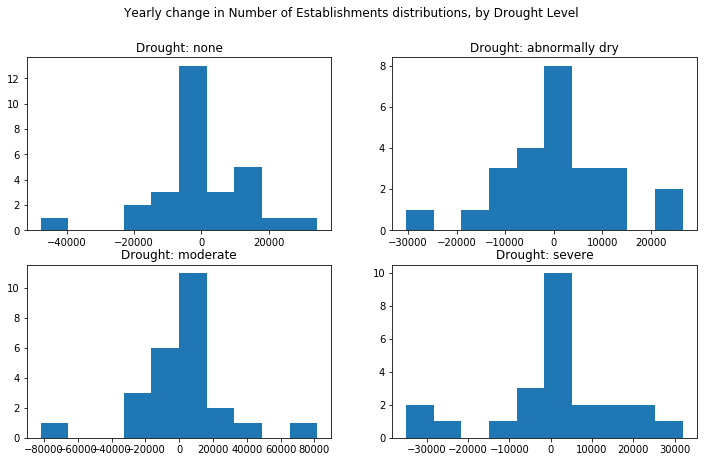

In [112]:
fig, (a1, a2) = plt.subplots(2, 2,figsize=(12,7))
fig.suptitle('Yearly change in Number of Establishments distributions, by Drought Level')
a1[0].hist(est_none) 
a1[0].set_title('Drought: none');
a1[1].hist(est_dry)
a1[1].set_title('Drought: abnormally dry');
a2[0].hist(est_moderate) 
a2[0].set_title('Drought: moderate');
a2[1].hist(est_severe)
a2[1].set_title('Drought: severe');


The following table shows the result of comparing all pairs of drought levels and performing t-tests on their yearly change in Number of Establishments means. The table shows that no significant differences in means were found at a significance level of $\alpha = 0.05$, which suggests that drought levels do not effect Number of Establishments. These results were verified with the ANOVA test (`f_oneway`), and because of the apparent non-normality of one or more of the histograms, the non-parametric Kruskal-Wallis test was used to make sure our conclusions were valid (see following two cells). All tests showed lack of significant effect.

We used `alternative='larger'` because we hypothesized that the change in Number of Establishments would be larger (more establishments added per year) for counties experiencing less severe drought.

In [113]:
#print('Overall Comparisons for Change in Number of Establishments by Drought Level')

# perform 2 sample t-test on all pairs of drought levels
pd.DataFrame(
    {'None - Dry': ttest_ind(est_none, est_dry, alternative='larger'),
     'None - Moderate': ttest_ind(est_none, est_moderate, alternative='larger'), 
     'None - Severe': ttest_ind(est_none, est_severe, alternative='larger'),
     'Dry - Moderate': ttest_ind(est_dry, est_moderate, alternative='larger'),
     'Dry - Severe': ttest_ind(est_dry, est_severe, alternative='larger'),
     'Moderate - Severe': ttest_ind(est_moderate, est_severe, alternative='larger'),
    },
    index = ['t statistic', 'p value', 'df']).T.style.set_caption('Overall Comparisons for Change in Number of Establishments by Drought Level')

,t statistic,p value,df
None - Dry,-0.116823,0.546275,52
None - Moderate,-0.145695,0.557637,52
None - Severe,-0.0918182,0.536399,51
Dry - Moderate,-0.0710751,0.528183,48
Dry - Severe,0.0106711,0.495766,47
Moderate - Severe,0.0722652,0.471349,47


In [114]:
# perform ANOVA test to double check t-test results
# perform Kruskal-Wallis becuase of skew in histogram to verify results

(f_oneway(est_none, est_dry, est_moderate, est_severe), 
kruskal(est_none, est_dry, est_moderate, est_severe))

(F_onewayResult(statistic=0.009812149444284516, pvalue=0.9986588806158291),
 KruskalResult(statistic=0.5011459916046306, pvalue=0.9186395702552006))

Next, effects of drought levels were compared for each socio-economic group. The following histograms show that because of the relatively small sample size, we could not ensure the normality assumption was met, and so the Kruskal-Wallis non-parametric test was used rather than two-sample t-tests to test for difference in means across groups.

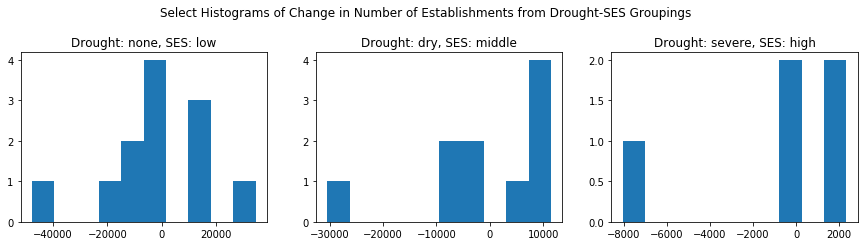

In [115]:
fig, ax = plt.subplots(1,3, figsize=(15,3.5))
fig.suptitle('Select Histograms of Change in Number of Establishments from Drought-SES Groupings')

ax[0].hist(est_dict['Drought: 0, SES: Low'])
ax[0].set_title('Drought: none, SES: low')
ax[1].hist(est_dict['Drought: 1, SES: Middle'])
ax[1].set_title('Drought: dry, SES: middle')
ax[2].hist(est_dict['Drought: 3, SES: High'])
ax[2].set_title('Drought: severe, SES: high');
plt.subplots_adjust(top=0.8)

The first table below shows the results of performing the same tests as above, but for each socio-economic group. Again, no significant differences were found at a significance level of $\alpha = 0.05$, which suggests no effect of drought on change in Number of Establishments among socio-economic groups.

The second table shows the results of comparing changes in Number of Establishments of each socio-economic group at each level of drought. This test was performed because we hypothesized that lower socio-economic communities would be more affected by severe drought levels than higher socio-economic groups. No significant differences in means were found, which again suggests that drought does not influence change in Number of Establishments.

In [116]:
# perform Kruskal-Wallis test for difference in means by drought levels across each socio-economic group

display(pd.DataFrame({'Low': list(kruskal(est_dict['Drought: 0, SES: Low'], 
         est_dict['Drought: 1, SES: Low'], 
         est_dict['Drought: 2, SES: Low'], 
         est_dict['Drought: 3, SES: Low'])),
 'Middle': list(kruskal(est_dict['Drought: 0, SES: Middle'], 
         est_dict['Drought: 1, SES: Middle'], 
         est_dict['Drought: 2, SES: Middle'], 
         est_dict['Drought: 3, SES: Middle'])),
 'High': list(kruskal(est_dict['Drought: 0, SES: High'], 
         est_dict['Drought: 1, SES: High'], 
         est_dict['Drought: 2, SES: High'], 
         est_dict['Drought: 3, SES: High']))}, index=['H statistic', 'p value']).T)

# perform Kruskal-Wallis test for difference in means by socio-economic group across drought levels

display(pd.DataFrame({'None': list(kruskal(est_dict['Drought: 0, SES: Low'], 
         est_dict['Drought: 0, SES: Middle'], 
         est_dict['Drought: 0, SES: High'])),
 'Dry': list(kruskal(est_dict['Drought: 1, SES: Low'], 
         est_dict['Drought: 1, SES: Middle'], 
         est_dict['Drought: 1, SES: High'])),
 'Moderate': list(kruskal(est_dict['Drought: 2, SES: Low'], 
         est_dict['Drought: 2, SES: Middle'], 
         est_dict['Drought: 2, SES: High'])),
 'Severe': list(kruskal(est_dict['Drought: 3, SES: Low'], 
         est_dict['Drought: 3, SES: Middle'], 
         est_dict['Drought: 3, SES: High']))}, index=['H statistic', 'p value']).T)

,H statistic,p value
Low,0.474448,0.924468
Middle,0.120000,0.989334
High,0.985326,0.804803


,H statistic,p value
None,0.181034,0.913459
Dry,0.018462,0.990812
Moderate,0.612923,0.736047
Severe,1.062889,0.587755


The results of the above tests, and in particular the lack of any significant differences in mean changes in these variables across the different groups, suggests that drought levels do not affect economic performance, even across different socio-economic groups.

In [117]:
#linear modelling testing
outcome_1, predictors_1 = patsy.dmatrices("pay_per_employee ~ drought_level", data = drought_levels)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:       pay_per_employee   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     42.77
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           9.87e-11
Time:                        09:43:10   Log-Likelihood:                -3934.1
No. Observations:                 986   AIC:                             7872.
Df Residuals:                     984   BIC:                             7882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        34.2213      0.609     56.174

In [118]:
#this one can be changed for whatver we want it to be, ses_group could be poverty_percent it could be lvl[0-4]
#in the end it shows that drought alone seems to correlate well, but when adding in any of these other more detailed
#factors, the p value shoots up and it begins to break downz
outcome_2, predictors_2 = patsy.dmatrices("pay_per_employee ~ drought_level : ses_group", data = drought_levels)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:       pay_per_employee   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     62.02
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.01e-36
Time:                        09:43:10   Log-Likelihood:                -3869.5
No. Observations:                 986   AIC:                             7747.
Df Residuals:                     982   BIC:                             7767.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

# Ethics & Privacy

As the data for this research will only require looking at quantitative measures such as income values or disease rates, there will be no need for personal information if it presents itself. To best protect the privacy of the individuals we are collecting data from, all personal information not related to the data sets specifically (such as name or address of the household we are collecting utility data from) will be removed in the end results. We do not believe though that our question or datasets are invasive in nature and predict this will be of little occurrence if any. For our analyses, being aware of the racial inequalities present in low income communities is important. Before making any specific generalizations, we will make sure (if the data is available) that the ethnicities of households or individuals that are making up the census data are representative of the communities we are looking at. 

# Conclusions and Discussion

## TO-DP
1. Use geo-pandas to generate the map with Data
2. Clean up the research question, remove the part of analysis that we didn't do. 
3. Fix the question. 
4. Have the data set write up for the income data. 
5. Explanation of the dataset
6. Go through the thing and 
7. Use percentage change of poverty instead of other indicators
8. Address no missingness because of census data
9. Rewrite the Ethics and Privacy part
10. Describe the linear model at the end. 
11. Discuss the improvements. 
12. Time series plots?
13. 